Loading the Data from csv file

In [55]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [56]:
df = pd.read_csv('heart_disease_dataset.csv')

print(df.head(2))

   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1            NaN               5             No       No      No   

   Stress Level  Blood Sugar Exercise Induced Angina  Chest Pain Type  \
0             8          119                     Yes  Atypical Angina   
1             9           70                     Yes   Typical Angina   

   Heart Disease  
0              1  
1              0  


In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [58]:
print(df.describe())

               Age  Cholesterol  Blood Pressure   Heart Rate  Exercise Hours  \
count  1000.000000  1000.000000       1000.0000  1000.000000     1000.000000   
mean     52.293000   249.939000        135.2810    79.204000        4.529000   
std      15.727126    57.914673         26.3883    11.486092        2.934241   
min      25.000000   150.000000         90.0000    60.000000        0.000000   
25%      39.000000   200.000000        112.7500    70.000000        2.000000   
50%      52.000000   248.000000        136.0000    79.000000        4.500000   
75%      66.000000   299.000000        159.0000    89.000000        7.000000   
max      79.000000   349.000000        179.0000    99.000000        9.000000   

       Stress Level  Blood Sugar  Heart Disease  
count   1000.000000  1000.000000    1000.000000  
mean       5.646000   134.941000       0.392000  
std        2.831024    36.699624       0.488441  
min        1.000000    70.000000       0.000000  
25%        3.000000   104.000

To display the dataframe in table format

In [59]:
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [60]:
# test_table = create_scrollable_table(df.head(100), 'Test Table', 'Test Table')
test_table = create_scrollable_table(df, 'Test Table', 'Test Table')
display(HTML(test_table))

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,Male,309,110,73,Never,NaN,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
6,64,Female,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1
7,60,Female,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1
8,37,Female,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0
9,63,Male,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1


In [61]:
df.shape

(1000, 16)

In [62]:
df.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')

In [63]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'family_history',
       'diabetes', 'obesity', 'stress_level', 'blood_sugar',
       'exercise_induced_angina', 'chest_pain_type', 'heart_disease'],
      dtype='object')

Data Cleaning

In [64]:
# Check for missing values
print(df.isnull().sum())
# df.isna().sum()

age                          0
gender                       0
cholesterol                  0
blood_pressure               0
heart_rate                   0
smoking                      0
alcohol_intake             340
exercise_hours               0
family_history               0
diabetes                     0
obesity                      0
stress_level                 0
blood_sugar                  0
exercise_induced_angina      0
chest_pain_type              0
heart_disease                0
dtype: int64


In [65]:
if df.duplicated().values.any():
    print("Duplicate row is there.")
else:
    print('no Duplicate row is there.')

no Duplicate row is there.


In [66]:
df['alcohol_intake'].unique()

array(['Heavy', nan, 'Moderate'], dtype=object)

In [67]:
df['alcohol_intake'].value_counts()

alcohol_intake
Heavy       346
Moderate    314
Name: count, dtype: int64

In [68]:
df['alcohol_intake'].isnull().sum()

340

alcohol_intake column has nan values

In [69]:
df['alcohol_intake'] = df['alcohol_intake'].replace(np.nan, "Light/None")
df['alcohol_intake'].unique()

array(['Heavy', 'Light/None', 'Moderate'], dtype=object)

In [70]:
alcohol_cng_test = create_scrollable_table(df.head(50), 'Alcohol change Test', 'Alcohol change Test')
display(HTML(alcohol_cng_test))

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Light/None,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Light/None,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Light/None,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,Male,309,110,73,Never,Light/None,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
6,64,Female,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1
7,60,Female,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1
8,37,Female,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0
9,63,Male,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1


In [71]:
df.describe()

,age,cholesterol,blood_pressure,heart_rate,exercise_hours,stress_level,blood_sugar,heart_disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      1000 non-null   int64 
 1   gender                   1000 non-null   object
 2   cholesterol              1000 non-null   int64 
 3   blood_pressure           1000 non-null   int64 
 4   heart_rate               1000 non-null   int64 
 5   smoking                  1000 non-null   object
 6   alcohol_intake           1000 non-null   object
 7   exercise_hours           1000 non-null   int64 
 8   family_history           1000 non-null   object
 9   diabetes                 1000 non-null   object
 10  obesity                  1000 non-null   object
 11  stress_level             1000 non-null   int64 
 12  blood_sugar              1000 non-null   int64 
 13  exercise_induced_angina  1000 non-null   object
 14  chest_pain_type          1000 non-null   

In [73]:
# Check for duplicate rows
print(df.duplicated().sum())

0


Q1) Which Age group of people have high risk of Heart Disease? Explain your Answer with plots and few sentences.


The following charts shows that people who are between the ages of 50 and 80 have a high risk of heart disease.  
This indicates that older age groups have a higher risk of heart disease. Age is a significant factor in heart disease risk


In [74]:
# Filter the dataset for heart disease
heart_disease_df = df[df['heart_disease'] == 1]

C:\Users\hp\AppData\Local\Temp\ipykernel_30092\3143844806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_df['age_group'] = pd.cut(heart_disease_df['age'], bins=bins, labels=labels, right=False)


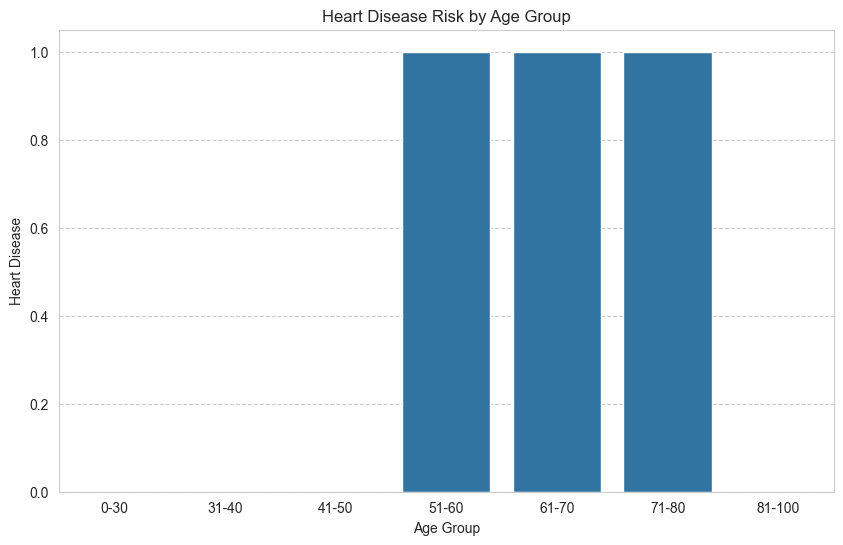

In [75]:
# age groups
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
heart_disease_df['age_group'] = pd.cut(heart_disease_df['age'], bins=bins, labels=labels, right=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='heart_disease', data=heart_disease_df)
plt.title('Heart Disease Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease')
plt.show()


<Axes: xlabel='age_group', ylabel='heart_disease'>

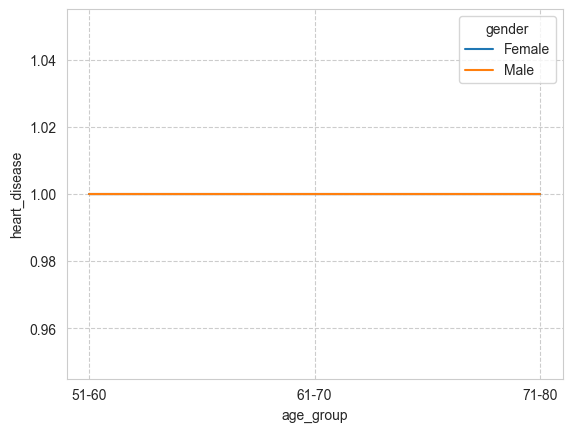

In [76]:

sns.lineplot(data=heart_disease_df, x="age_group", y="heart_disease",  hue="gender")

<Axes: xlabel='heart_disease', ylabel='count'>

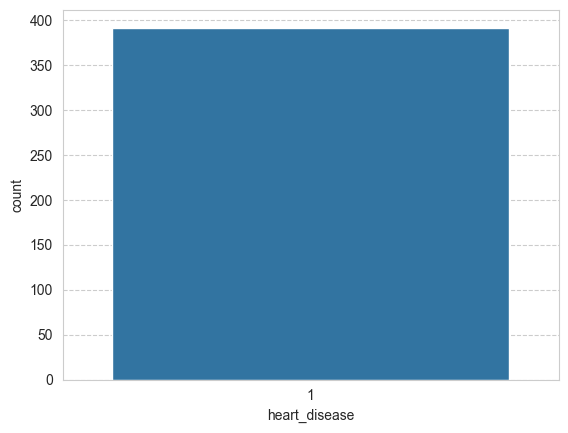

In [77]:
sns.countplot(data=heart_disease_df, x='heart_disease')

In [78]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [79]:
# heart disease risk per age group
age_group_risk = heart_disease_df.groupby('age_group', observed=True)['heart_disease'].mean().reset_index()

In [80]:
heart_disease_df.groupby('age_group', observed=True)['heart_disease'].mean()

age_group
51-60    1.0
61-70    1.0
71-80    1.0
Name: heart_disease, dtype: float64

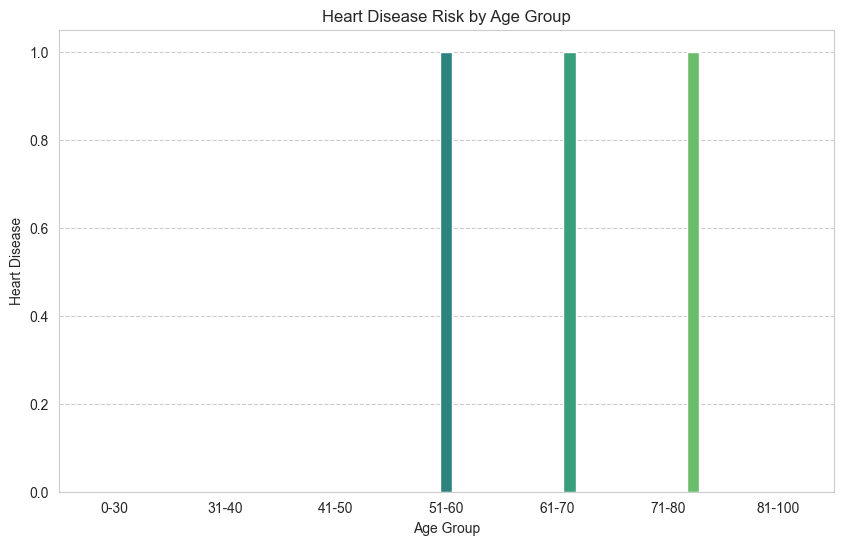

In [81]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='heart_disease', data=age_group_risk, palette='viridis', hue='age_group')
plt.title('Heart Disease Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease')
plt.show()


In [82]:
age_group_risk

,age_group,heart_disease
0,51-60,1.0
1,61-70,1.0
2,71-80,1.0


In [83]:
sns.lineplot(data=df, x="age_group", y="heart_disease",  hue="gender")

ValueError: Could not interpret value `age_group` for `x`. An entry with this name does not appear in `data`.

In [ ]:
df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'family_history',
       'diabetes', 'obesity', 'stress_level', 'blood_sugar',
       'exercise_induced_angina', 'chest_pain_type', 'heart_disease'],
      dtype='object')

In [ ]:
# age groups
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [ ]:
df.groupby('age_group', observed=True)['heart_disease'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_12504\3951769013.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['heart_disease'].mean()


age_group
0-30      0.000000
31-40     0.000000
41-50     0.000000
51-60     0.685083
61-70     0.728261
71-80     0.736264
81-100         NaN
Name: heart_disease, dtype: float64

In [ ]:
heart_disease_prevalence = df['heart_disease'].value_counts()
heart_disease_prevalence

heart_disease
0    608
1    392
Name: count, dtype: int64

In [ ]:
heart_disease_prevalence = df['heart_disease'].value_counts(normalize=True) 
heart_disease_prevalence

heart_disease
0    0.608
1    0.392
Name: proportion, dtype: float64

In [ ]:
heart_disease_prevalence = df['heart_disease'].value_counts(normalize=True) * 100
heart_disease_prevalence

heart_disease
0    60.8
1    39.2
Name: proportion, dtype: float64

<Axes: xlabel='heart_disease', ylabel='count'>

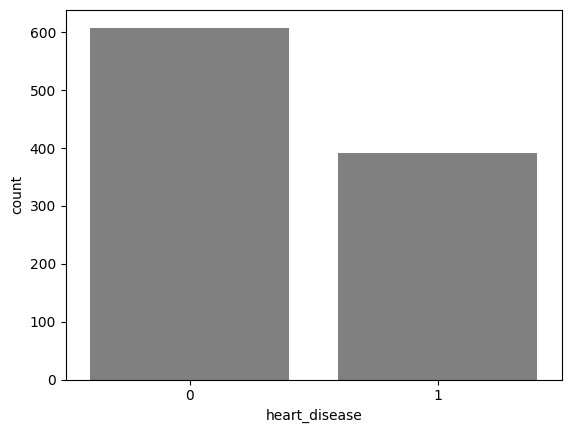

In [ ]:
# sns.countplot(data=df, x='heart_disease', palette='viridis')
color = ["Grey"] 
sns.set_palette(color) 
sns.countplot(data=df, x='heart_disease')


(array([608.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 392.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

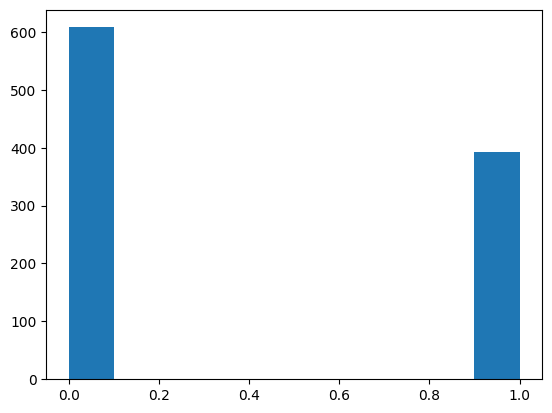

In [ ]:
plt.hist(df["heart_disease"])

Q2) Does Increased **Exercise Hours** reduce risk of **Heart Disease**? Explain your Answer with plots and few sentences.


The below charts shows that Average exercise hours without heart disease is higher than those with heart disease    
Increased exercise hours leads to lower risk of heart disease. Exercise might be a protective factor against heart disease.

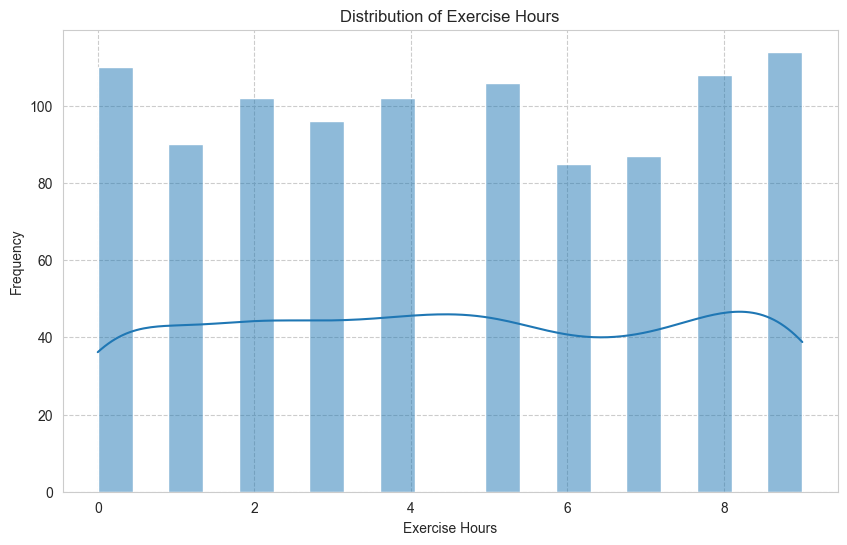

In [ ]:
# Distribution of exercise hours
plt.figure(figsize=(10, 6))
sns.histplot(df['exercise_hours'], kde=True, bins=20)
plt.title('Distribution of Exercise Hours')
plt.xlabel('Exercise Hours')
plt.ylabel('Frequency')
plt.show()


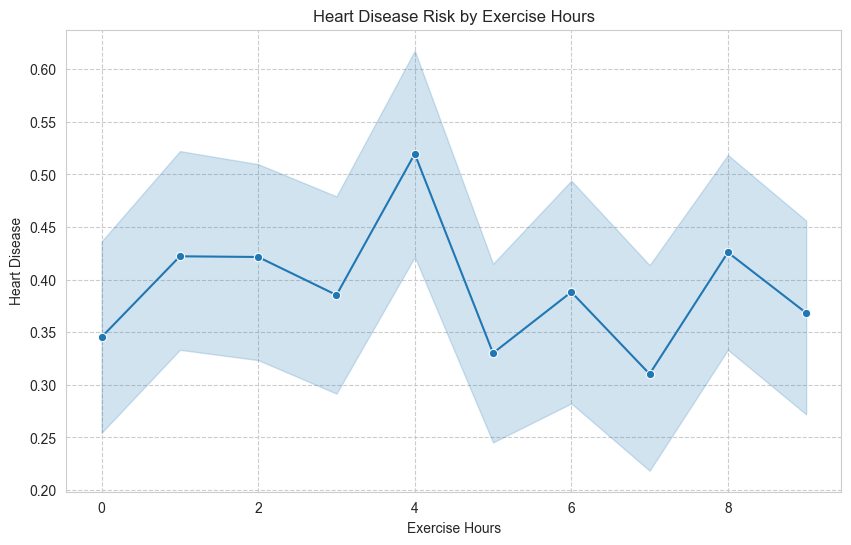

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x='exercise_hours', y='heart_disease', data=df, marker='o')
plt.title('Heart Disease Risk by Exercise Hours')
plt.xlabel('Exercise Hours')
plt.ylabel('Heart Disease')
plt.show()

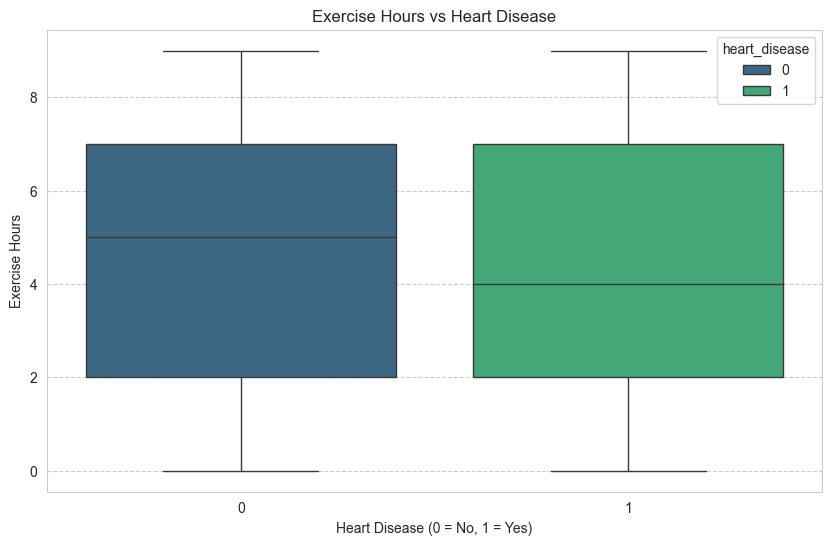

heart_disease
0    4.562500
1    4.477041
Name: exercise_hours, dtype: float64


In [ ]:
# plot to visualize the relationship between exercise hours and heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['heart_disease'], y=df['exercise_hours'], palette='viridis', hue=df['heart_disease'])
plt.title('Exercise Hours vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Exercise Hours')
plt.show()

# Calculate the average exercise hours for those with and without heart disease
average_exercise_hours = df.groupby('heart_disease')['exercise_hours'].mean()
print(average_exercise_hours)


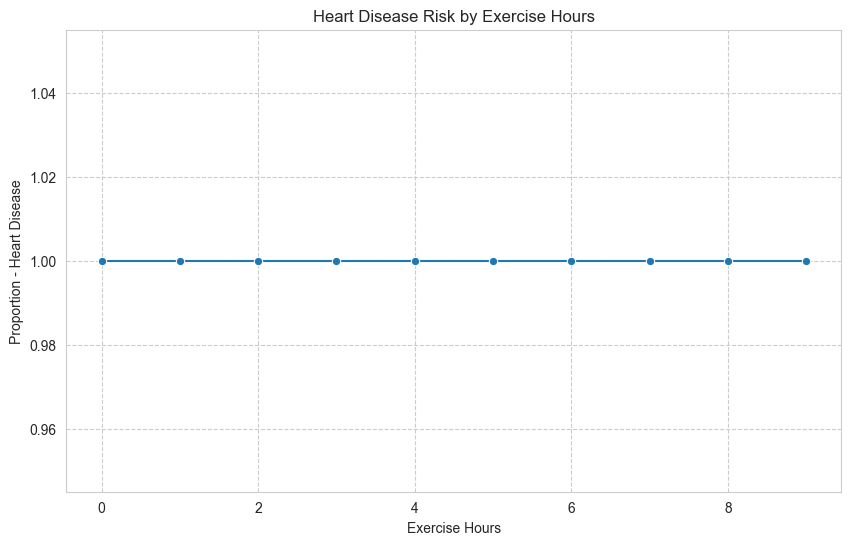

In [ ]:
exercise_hours_risk = heart_disease_df.groupby('exercise_hours')['heart_disease'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x='exercise_hours', y='heart_disease', data=exercise_hours_risk, marker='o')
plt.title('Heart Disease Risk by Exercise Hours')
plt.xlabel('Exercise Hours')
plt.ylabel('Proportion - Heart Disease')
plt.show()

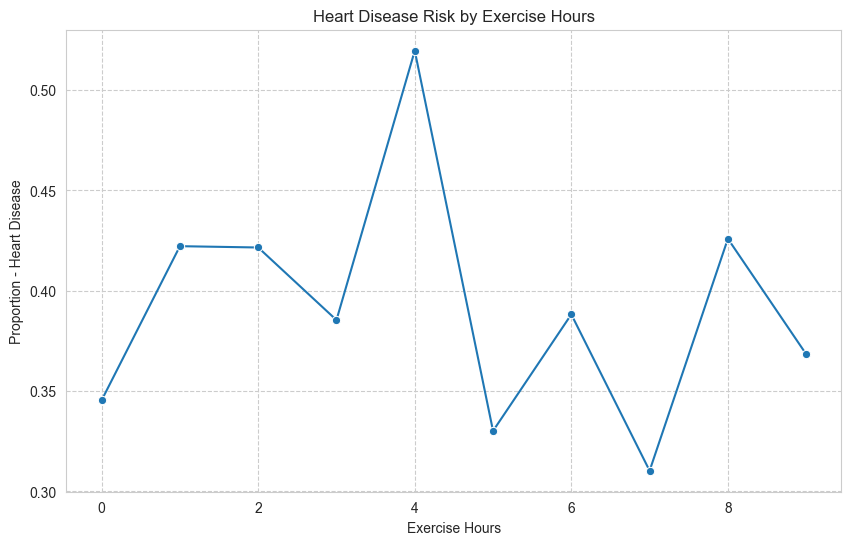

In [ ]:
exercise_hours_risk = df.groupby('exercise_hours')['heart_disease'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x='exercise_hours', y='heart_disease', data=exercise_hours_risk, marker='o')
plt.title('Heart Disease Risk by Exercise Hours')
plt.xlabel('Exercise Hours')
plt.ylabel('Proportion - Heart Disease')
plt.show()

In [ ]:
df.groupby('exercise_hours')['heart_disease'].mean()

exercise_hours
0    0.345455
1    0.422222
2    0.421569
3    0.385417
4    0.519608
5    0.330189
6    0.388235
7    0.310345
8    0.425926
9    0.368421
Name: heart_disease, dtype: float64

Q3) People who are **Smoking**, do they have high risk of **Heart Disease**? Explain your Answer with plots and few sentences.

Below charts shows that difference in the percentage of heart disease cases between smokers and non-smokers.    
The avg of heart disease is higher among smokers compared to non-smokers (never & former)    
So smoking is a risk factor for heart disease.

Below charts shows that difference in the percentage of heart disease cases between smokers and non-smokers.    
The avg of heart disease is higher when smoking, So smoking is a risk factor for heart disease.

In [ ]:
df['smoking'].value_counts()

smoking
Never      338
Current    336
Former     326
Name: count, dtype: int64

smoking
Never      338
Current    336
Former     326
Name: count, dtype: int64


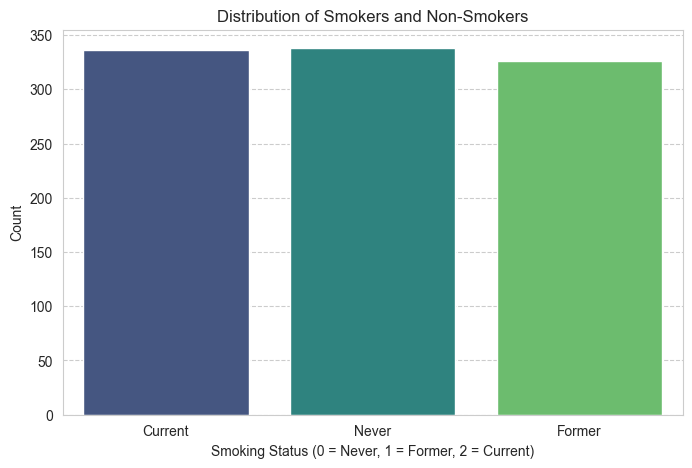

In [ ]:
smoking_distribution = df['smoking'].value_counts()
print(smoking_distribution)

# Plot the distribution of smokers and non-smokers
plt.figure(figsize=(8, 5))
sns.countplot(x='smoking', data=df, palette='viridis', hue='smoking')
plt.title('Distribution of Smokers and Non-Smokers')
plt.xlabel('Smoking Status (0 = Never, 1 = Former, 2 = Current)')
plt.ylabel('Count')
plt.show()

In [ ]:
smoking_heart_disease = df.groupby('smoking')['heart_disease'].mean() * 100
print(smoking_heart_disease)

smoking
Current    42.261905
Former     32.822086
Never      42.307692
Name: heart_disease, dtype: float64


In [ ]:
smoking_heart_disease_2 = heart_disease_df.groupby('smoking')['heart_disease'].mean() * 100
print(smoking_heart_disease_2)

smoking
Current    100.0
Former     100.0
Never      100.0
Name: heart_disease, dtype: float64


In [ ]:
smoking_heart_disease.index

Index(['Current', 'Former', 'Never'], dtype='object', name='smoking')

In [ ]:
smoking_heart_disease.values

array([42.26190476, 32.82208589, 42.30769231])

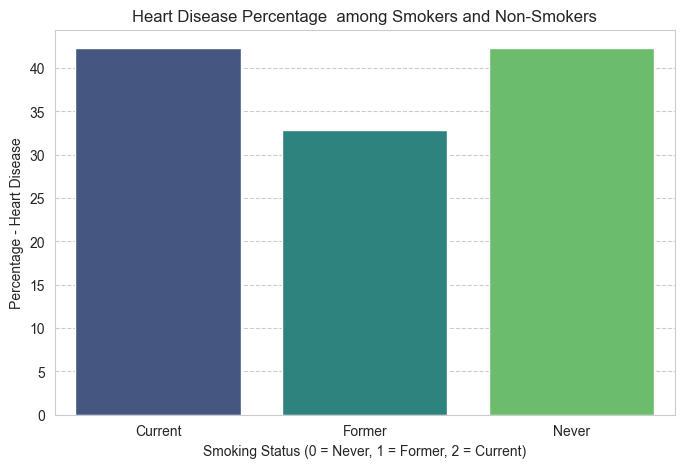

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=smoking_heart_disease.index, y=smoking_heart_disease.values, palette='viridis', hue=smoking_heart_disease.index)
plt.title('Heart Disease Percentage  among Smokers and Non-Smokers')
plt.xlabel('Smoking Status (0 = Never, 1 = Former, 2 = Current)')
plt.ylabel('Percentage - Heart Disease')
plt.show()

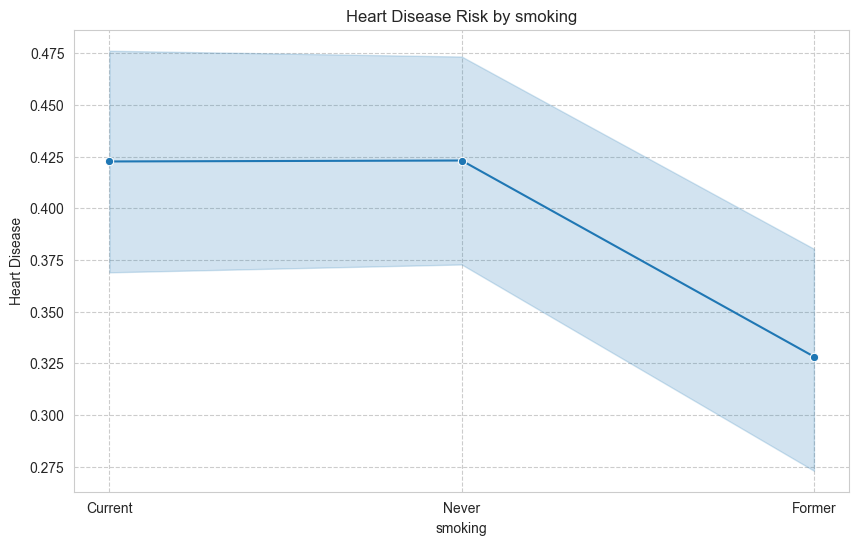

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x='smoking', y='heart_disease', data=df, marker='o')
plt.title('Heart Disease Risk by smoking')
plt.xlabel('smoking')
plt.ylabel('Heart Disease')
plt.show()

In [ ]:
smoking_heart_disease = df.groupby('smoking')['heart_disease'].mean()
print(smoking_heart_disease)

smoking
Current    0.422619
Former     0.328221
Never      0.423077
Name: heart_disease, dtype: float64


Q4) For people who have **Heart Disease**, what are the values of **Cholesterol**, **Blood Pressure**, **Heart Rate**, and **Blood Sugar**? Explain your Answer with plots and few sentences.


Below charts shows the distribution of Cholesterol, Blood Pressure, Heart Rate, and Blood Sugar of heart disease patients.  
A higher frequency at certain levels can indicate common ranges among heart disease patients.


In [ ]:
# Filter the dataset for individuals with heart disease
heart_disease_df = df[df['heart_disease'] == 1]

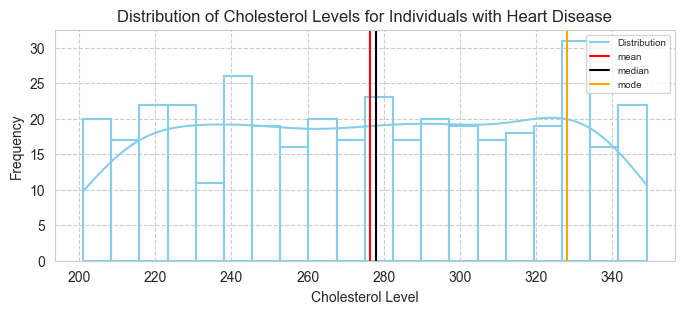

In [ ]:
# Distribution of cholesterol levels for individuals with heart disease
plt.figure(figsize=(8, 3))
sns.histplot(heart_disease_df['cholesterol'], kde=True, bins=20, color='skyblue', fill=False)
plt.title('Distribution of Cholesterol Levels for Individuals with Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.axvline(heart_disease_df["cholesterol"].mean(), color="red")
plt.axvline(heart_disease_df["cholesterol"].median(), color="black")
plt.axvline(list(heart_disease_df["cholesterol"].mode())[0], color="orange")
plt.legend(["Distribution","mean", "median", "mode"], loc ="upper right", fontsize="7")
plt.show()

In [ ]:
import statistics
print("median of cholesterol: ", statistics.median(heart_disease_df["cholesterol"]))
print("mean of cholesterol  : ", statistics.mean(heart_disease_df["cholesterol"]))
print("mode of cholesterol  : ", statistics.mode(heart_disease_df["cholesterol"]))
print("min of cholesterol   : ", min(heart_disease_df["cholesterol"]))
print("max of cholesterol   : ", max(heart_disease_df["cholesterol"]))
Q1 = heart_disease_df["cholesterol"].quantile(0.25)
print("25% of cholesterol   : ", Q1)
Q3 = heart_disease_df["cholesterol"].quantile(0.75)
print("75% of cholesterol   : ", Q3)

median of cholesterol:  278.0
mean of cholesterol  :  276.2551020408163
mode of cholesterol  :  328
min of cholesterol   :  201
max of cholesterol   :  349
25% of cholesterol   :  240.0
75% of cholesterol   :  317.0


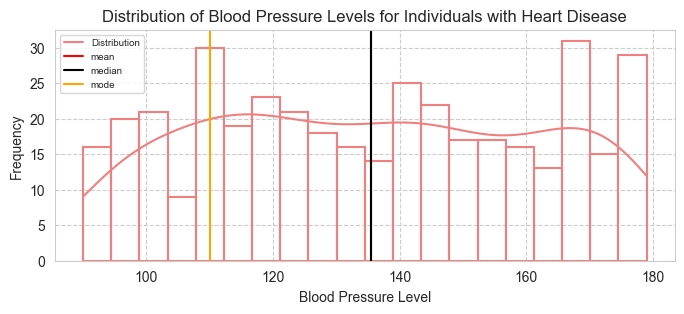

In [ ]:
# Distribution of blood pressure levels for individuals with heart disease
plt.figure(figsize=(8, 3))
sns.histplot(heart_disease_df['blood_pressure'], kde=True, bins=20, color='lightcoral', fill=False)
plt.title('Distribution of Blood Pressure Levels for Individuals with Heart Disease')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Frequency')
plt.axvline(heart_disease_df["blood_pressure"].mean(), color="red")
plt.axvline(heart_disease_df["blood_pressure"].median(), color="black")
plt.axvline(list(heart_disease_df["blood_pressure"].mode())[0], color="orange")
# plt.legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="7")
plt.legend(["Distribution", "mean", "median", "mode"], loc="upper left", fontsize="7")
plt.show()


In [ ]:
print("median of blood_pressure: ", statistics.median(heart_disease_df["blood_pressure"]))
print("mean of blood_pressure  : ", statistics.mean(heart_disease_df["blood_pressure"]))
print("mode of blood_pressure  : ", statistics.mode(heart_disease_df["blood_pressure"]))
print("min of blood_pressure   : ", min(heart_disease_df["blood_pressure"]))
print("max of blood_pressure   : ", max(heart_disease_df["blood_pressure"]))
Q1 = heart_disease_df["blood_pressure"].quantile(0.25)
print("25% of blood_pressure   : ", Q1)
Q3 = heart_disease_df["blood_pressure"].quantile(0.75)
print("75% of blood_pressure   : ", Q3)

median of blood_pressure:  135.5
mean of blood_pressure  :  135.5076530612245
mode of blood_pressure  :  110
min of blood_pressure   :  90
max of blood_pressure   :  179
25% of blood_pressure   :  113.0
75% of blood_pressure   :  158.25


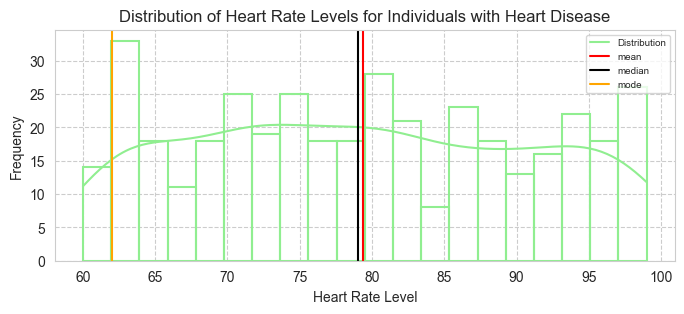

In [ ]:
# Distribution of heart rate levels for individuals with heart disease
plt.figure(figsize=(8, 3))
sns.histplot(heart_disease_df['heart_rate'], kde=True, bins=20, color='lightgreen', fill=False)
plt.title('Distribution of Heart Rate Levels for Individuals with Heart Disease')
plt.xlabel('Heart Rate Level')
plt.ylabel('Frequency')
plt.axvline(heart_disease_df["heart_rate"].mean(), color="red")
plt.axvline(heart_disease_df["heart_rate"].median(), color="black")
plt.axvline(list(heart_disease_df["heart_rate"].mode())[0], color="orange")
# plt.legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="7")
plt.legend(["Distribution", "mean", "median", "mode"], loc="upper right", fontsize="7")
plt.show()


In [ ]:
print("median of heart_rate: ", statistics.median(heart_disease_df["heart_rate"]))
print("mean of heart_rate  : ", statistics.mean(heart_disease_df["heart_rate"]))
print("mode of heart_rate  : ", statistics.mode(heart_disease_df["heart_rate"]))
print("min of heart_rate   : ", min(heart_disease_df["heart_rate"]))
print("max of heart_rate   : ", max(heart_disease_df["heart_rate"]))
Q1 = heart_disease_df["heart_rate"].quantile(0.25)
print("25% of heart_rate   : ", Q1)
Q3 = heart_disease_df["heart_rate"].quantile(0.75)
print("75% of heart_rate   : ", Q3)

median of heart_rate:  79.0
mean of heart_rate  :  79.39285714285714
mode of heart_rate  :  81
min of heart_rate   :  60
max of heart_rate   :  99
25% of heart_rate   :  70.0
75% of heart_rate   :  89.0


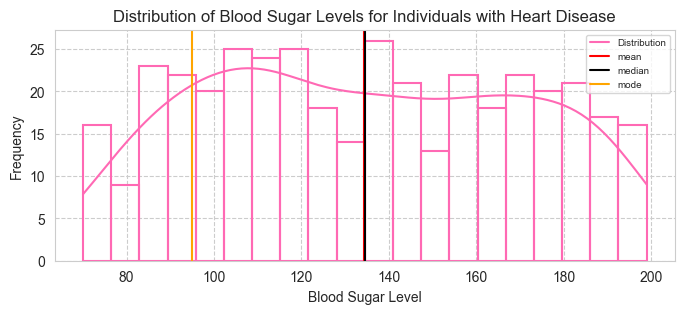

In [ ]:
# Distribution of blood sugar levels for individuals with heart disease
plt.figure(figsize=(8, 3))
sns.histplot(heart_disease_df['blood_sugar'], kde=True, bins=20, color='hotpink', fill=False)
plt.title('Distribution of Blood Sugar Levels for Individuals with Heart Disease')
plt.xlabel('Blood Sugar Level')
plt.ylabel('Frequency')
plt.axvline(heart_disease_df["blood_sugar"].mean(), color="red")
plt.axvline(heart_disease_df["blood_sugar"].median(), color="black")
plt.axvline(list(heart_disease_df["blood_sugar"].mode())[0], color="orange")
# plt.legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="7")
plt.legend(["Distribution", "mean", "median", "mode"], loc="upper right", fontsize="7")
plt.show()


In [ ]:
print("median of blood_sugar: ", statistics.median(heart_disease_df["blood_sugar"]))
print("mean of blood_sugar  : ", statistics.mean(heart_disease_df["blood_sugar"]))
print("mode of blood_sugar  : ", statistics.mode(heart_disease_df["blood_sugar"]))
print("min of blood_sugar   : ", min(heart_disease_df["blood_sugar"]))
print("max of blood_sugar   : ", max(heart_disease_df["blood_sugar"]))
Q1 = heart_disease_df["blood_sugar"].quantile(0.25)
print("25% of blood_sugar   : ", Q1)
Q3 = heart_disease_df["blood_sugar"].quantile(0.75)
print("75% of blood_sugar   : ", Q3)

median of blood_sugar:  134.5
mean of blood_sugar  :  134.3469387755102
mode of blood_sugar  :  95
min of blood_sugar   :  70
max of blood_sugar   :  199
25% of blood_sugar   :  104.0
75% of blood_sugar   :  166.0


Correlations

In [ ]:
df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'family_history',
       'diabetes', 'obesity', 'stress_level', 'blood_sugar',
       'exercise_induced_angina', 'chest_pain_type', 'heart_disease',
       'age_group'],
      dtype='object')

In [85]:
df_numeric = df.copy()

test_table_2 = create_scrollable_table(df_numeric.head(100), 'Test Table 2', 'Test Table 2')

display(HTML(test_table_2))

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Light/None,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Light/None,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Light/None,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,Male,309,110,73,Never,Light/None,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
6,64,Female,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1
7,60,Female,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1
8,37,Female,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0
9,63,Male,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1


In [86]:
gender_map = {
    'Female' : 0,
    'Male' : 1
}

df_numeric['gender'] = df_numeric['gender'].map(gender_map)

df_numeric.head()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,1,204,165,62,Current,Light/None,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,1,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,0,192,90,72,Current,Light/None,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,0,172,163,93,Never,Light/None,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [87]:
smoking_map = {
    'Never' : 0,
    'Former': 1, 
    'Current' : 2, 
}


alcohol_map = {
    'Light/None' : 0,
    'Moderate': 1, 
    'Heavy' : 2, 
}


yes_no_map = {
    'No' : 0,
    'Yes' : 1
}

cheat_pain_map = {
    'Asymptomatic': 0,
    'Non-anginal Pain': 1,
    'Atypical Angina' : 2,
    'Typical Angina' : 3    
}


df_numeric['smoking'] = df_numeric['smoking'].map(smoking_map)

df_numeric['alcohol_intake'] = df_numeric['alcohol_intake'].map(alcohol_map)

df_numeric['family_history'] = df_numeric['family_history'].map(yes_no_map)

df_numeric['diabetes'] = df_numeric['diabetes'].map(yes_no_map)

df_numeric['obesity'] = df_numeric['obesity'].map(yes_no_map)

df_numeric['exercise_induced_angina'] = df_numeric['exercise_induced_angina'].map(yes_no_map)

df_numeric['chest_pain_type'] = df_numeric['chest_pain_type'].map(cheat_pain_map)

df_numeric.head()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,2,2,1,0,0,1,8,119,1,2,1
1,48,1,204,165,62,2,0,5,0,0,0,9,70,1,3,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,2,1
3,69,0,192,90,72,2,0,4,0,1,0,7,107,1,1,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,0,0


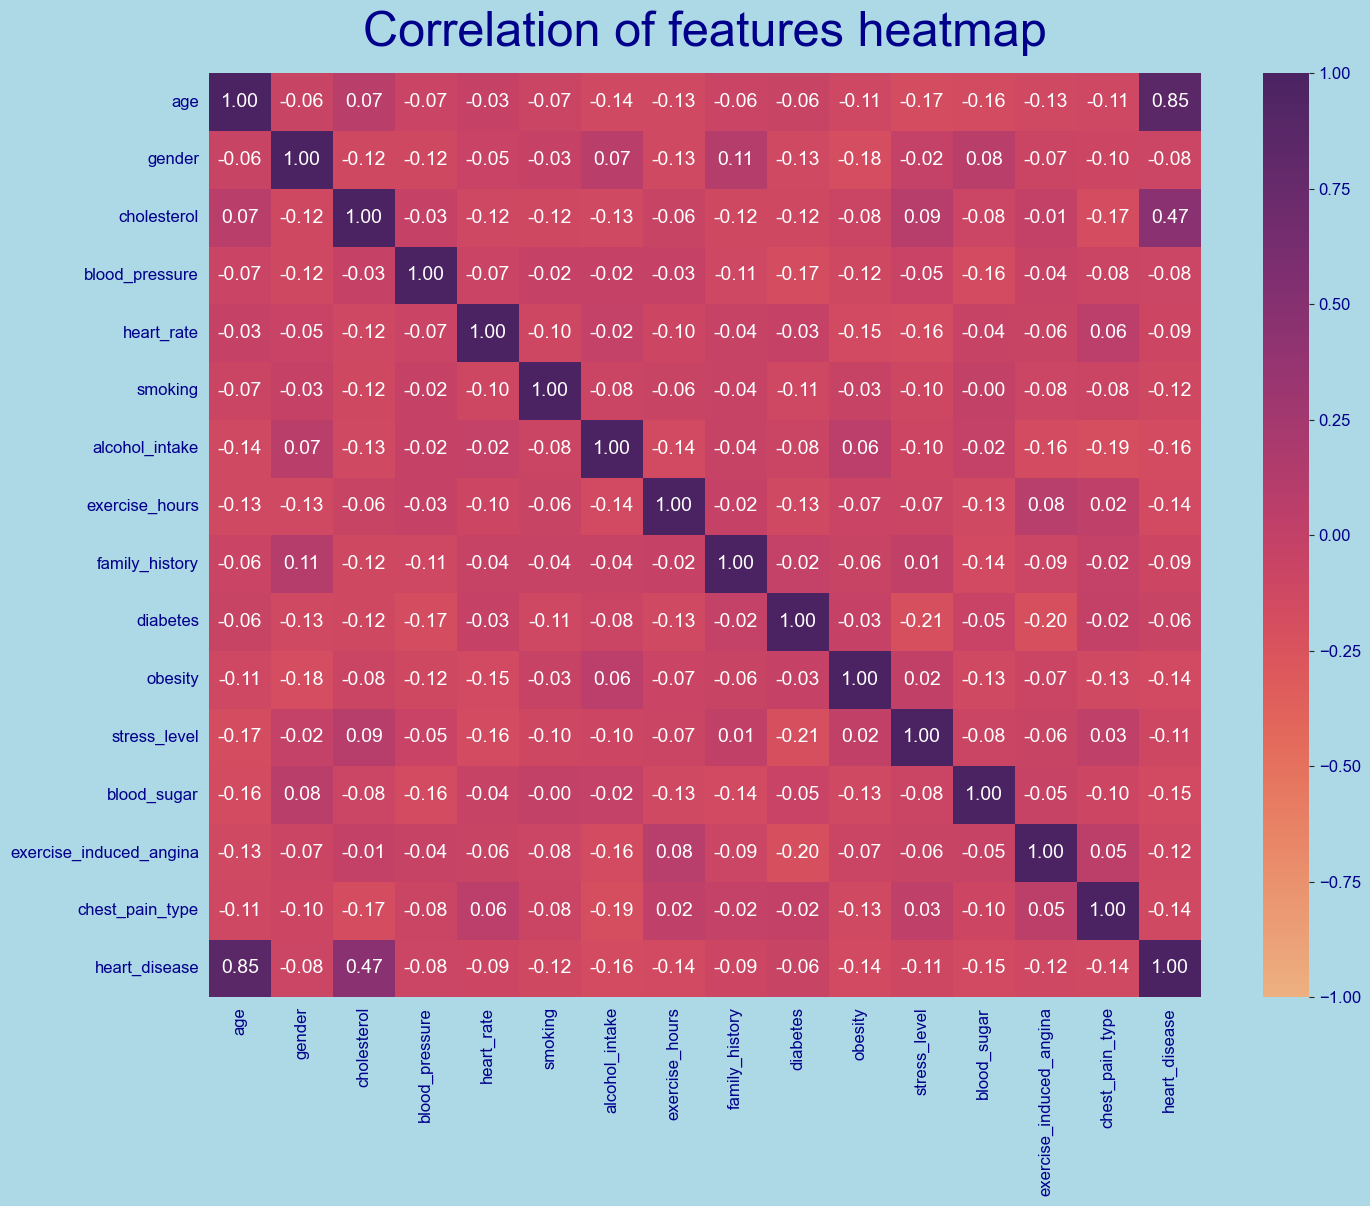

In [ ]:
numeric_cols = df_numeric.select_dtypes(include=[np.number]).columns
df_crr = df_numeric[numeric_cols].corr()

plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(df_crr.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='flare',annot_kws={"fontsize":14}, fmt='.2f')
sns.set(font_scale=2)
plt.title('Correlation of features heatmap',fontsize=35, color='darkblue', pad=20)
plt.xticks(color='darkblue', fontsize=12)
plt.yticks(color='darkblue', fontsize=12)

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelcolor='darkblue', labelsize=12)

plt.gcf().patch.set_facecolor('lightblue')
plt.show()

 Q5) People who have both **Diabetes** AND **Obesity**, do they have **Heart Disease**? Explain your Answer with plots and few sentences.

Heart disease is significantly higher in the "Diabetes only" group than "Diabetes and Obesity"


The below shows the group "Diabetes and Obesity" having the Heart disease.


In [90]:
# the dataset with both diabetes and obesity
diabetes_obesity_df = df_numeric[(df_numeric['diabetes'] == 1) & (df_numeric['obesity'] == 1)]
diabetes_obesity_df

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
5,77,1,309,110,73,0,0,0,0,1,1,4,122,1,0,1
6,64,0,211,105,86,1,2,8,1,1,1,2,120,0,3,1
7,60,0,208,148,83,0,1,4,0,1,1,2,113,1,0,1
8,37,0,317,137,66,2,2,3,0,1,1,5,114,0,1,0
17,46,0,259,118,76,0,2,4,0,1,1,8,76,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,69,0,223,147,66,1,0,4,1,1,1,1,118,0,1,1
987,38,0,217,104,65,0,1,2,1,1,1,2,75,1,2,0
992,28,0,220,102,73,2,1,7,1,1,1,10,102,0,3,0
994,52,1,248,159,76,1,1,9,0,1,1,2,152,1,0,1


In [ ]:
len(diabetes_obesity_df)

253

In [91]:
diabetes_obesity_df['heart_disease'].value_counts()

heart_disease
0    158
1     95
Name: count, dtype: int64

In [ ]:
diabetes_obesity_df['heart_disease'].mean() * 100

37.54940711462451

In [ ]:
# Calculate the proportion of individuals with both diabetes and obesity who have heart disease
diabetes_obesity_heart_disease = diabetes_obesity_df['heart_disease'].mean() * 100
print(f"Proportion of individuals with both diabetes and obesity who have heart disease: {diabetes_obesity_heart_disease:.2f}%")

Proportion of individuals with both diabetes and obesity who have heart disease: 37.55%


In [88]:
len(df_numeric)

1000

In [ ]:
# Create a new column to categorize individuals
df_numeric['condition'] = 'None'
df_numeric.loc[(df_numeric['diabetes'] == 1) & (df_numeric['obesity'] == 0), 'condition'] = 'Diabetes only'
df_numeric.loc[(df_numeric['diabetes'] == 0) & (df_numeric['obesity'] == 1), 'condition'] = 'Obesity only'
df_numeric.loc[(df_numeric['diabetes'] == 1) & (df_numeric['obesity'] == 1), 'condition'] = 'Diabetes and Obesity'
df_numeric['condition'].value_counts()

condition
Diabetes and Obesity    253
Diabetes only           252
None                    249
Obesity only            246
Name: count, dtype: int64

condition
Diabetes and Obesity    37.549407
Diabetes only           42.460317
None                    37.751004
Obesity only            39.024390
Name: heart_disease, dtype: float64


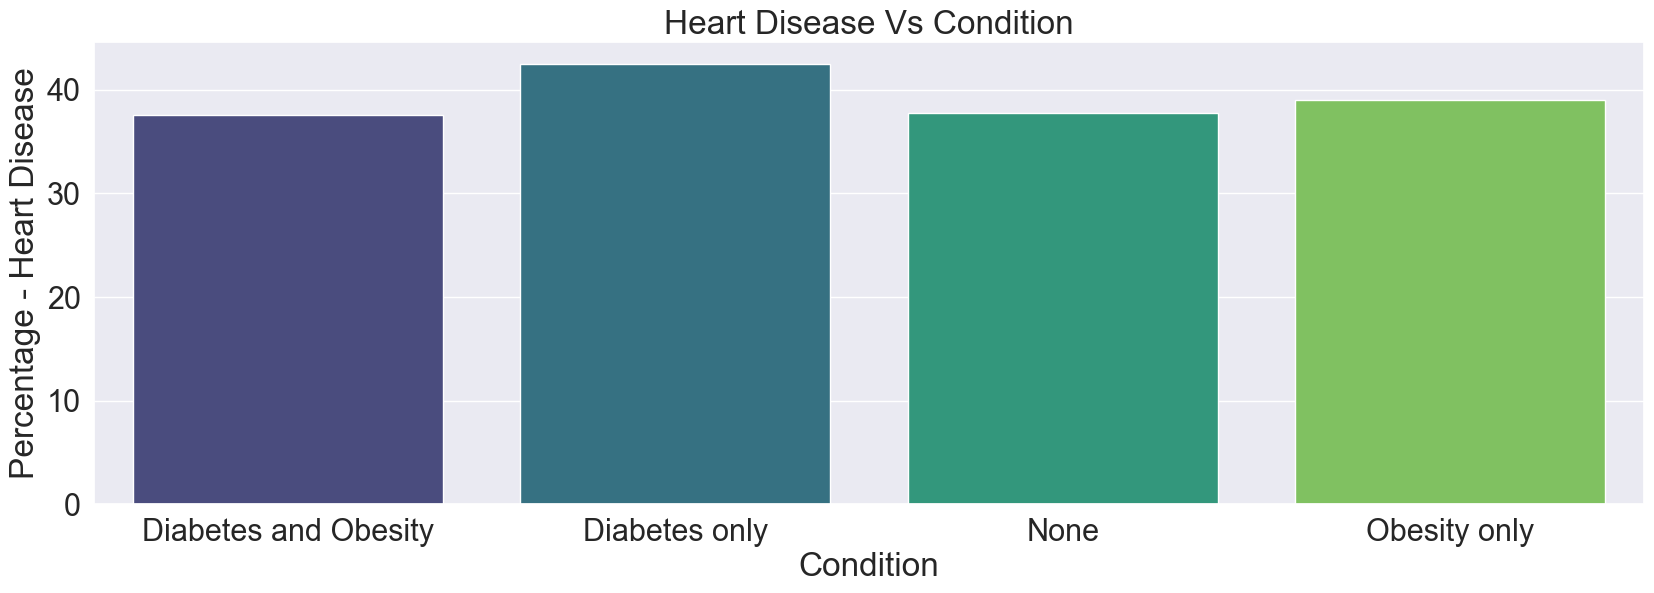

In [ ]:





# Calculate the proportion of heart disease in each group
heart_disease_by_condition = df_numeric.groupby('condition')['heart_disease'].mean() * 100
print(heart_disease_by_condition)

# Plotting the proportion of individuals with heart disease in each group
plt.figure(figsize=(20, 6))
sns.barplot(x=heart_disease_by_condition.index, y=heart_disease_by_condition.values, palette='viridis', hue=heart_disease_by_condition.index)
plt.title('Heart Disease Vs Condition')
plt.xlabel('Condition')
plt.ylabel('Percentage - Heart Disease')
plt.show()

In [ ]:
heart_disease_by_condition.index[0]

'Diabetes and Obesity'

In [ ]:
heart_disease_by_condition.values[0]

37.54940711462451

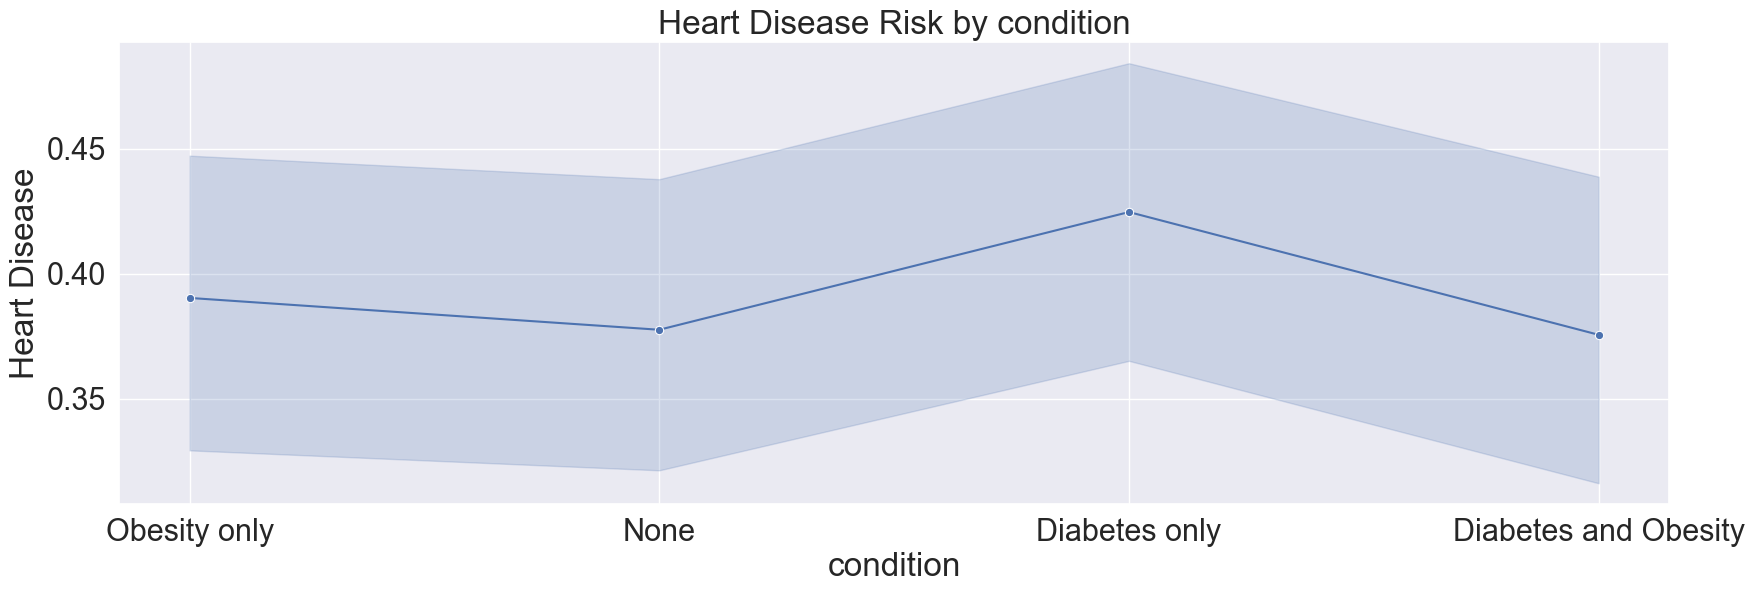

In [ ]:
# Plot the results
plt.figure(figsize=(20, 6))
sns.lineplot(x='condition', y='heart_disease', data=df_numeric, marker='o')
plt.title('Heart Disease Risk by condition')
plt.xlabel('condition')
plt.ylabel('Heart Disease')
plt.show()

In [ ]:
heart_disease_prevalence = df_numeric['heart_disease'].value_counts(normalize=True)
heart_disease_prevalence

heart_disease
0    0.608
1    0.392
Name: proportion, dtype: float64

In [ ]:
df_numeric.groupby('condition')['heart_disease'].mean()

condition
Diabetes and Obesity    0.375494
Diabetes only           0.424603
None                    0.377510
Obesity only            0.390244
Name: heart_disease, dtype: float64